# SECTION-1

In [ ]:
from PIL import Image
path = '/content/drive/My Drive/Colab Notebooks/Deep Learning/Cousera/' 

# Logistics Regression as NN

##Image Imput

-  To store an image your computer;

    - The computer stores 3-separate matrices corresponding to the red, green, and blue color channels of this image.

    - So if the input image is 64 pixels by 64 pixels, 
    
    - then there would be 3-[64 by 64] matrices corresponding to the red, green and blue pixel intensity values for the images

- To turn these pixel intensity values- Into a feature vector,

    -  the pixel values wil be unrolled into an input feature vector x.

    - i.e **each value in all the 3-matrices will be listed as individual elements of a long column vector**

    - for a 64*64 pixel images...we will be a single vector of [64 x 64 x 3]= 12288 as the dimension of our vector 

    - the dimension of the input feature bcoms nx= 12288


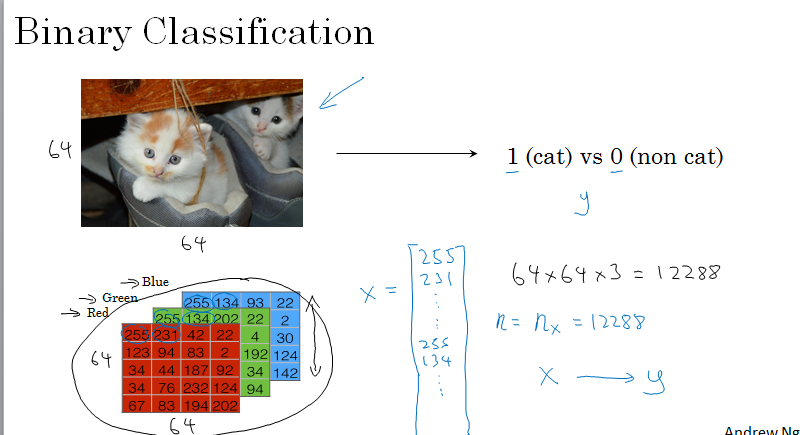

In [ ]:
path1 = path + '1.PNG'
img = Image.open(path1)
img

##Logistics Regression

- this is for binary classification

  - Given an input feature vector X (maybe for an image to be as either a cat picture or not a cat);
  
  - we want an algorithm that can output a prediction (Y hat), which is an estimate of Y. 
  
  - Y hat wil be the probability that, **Y = 1 given the input features(X)**, and its values bwt 0 and 1

- The parameters of the logistics regression are;

  - $w \in R^{n_{x}} $  

  - $b \in R$

- The main question is; **Given an input $X$ and parameters $w$ and $b$, how do we generate the output y_hat**

  -  One method is to have y as a linear function of the input X like in linear regression such that ;
  
  $$Y_{hat} = w^{T}x + b ...(i)$$ . 
  
  - But this isn't a very good algorithm for binary classification because we want $Y_{hat}$ to be the chance that $Y = 1$, i.e $Y_hat$ should really be btw 0 and 1.

  - and the eqn above can be much bigger than 1 or even be -ve, which isnot what we want for a probability

- in Logistics Regression however, the output will be;

  $$Y_{hat} = \sigma(w^{T}x + b )$$

- The sigmoid function is given by ;$$\sigma(z) = \frac{1}{1+\exp(-z)}$$;

  - if $z$ is large or +ve inf, $\exp(-inf)$ will be close to $0$, and $\sigma(z) \approx 1$

  - if $z$ is very small or -ve inf, $\exp(+inf)$ will tend towards $inf$, and $\sigma(z) \approx 0 $


- So when implementing logistic regression, the main goal is to try learn parameters $W$ and $b$ so that $Y_{hat}$ becomes a good estimate of the chance of $Y$ being equal to one.




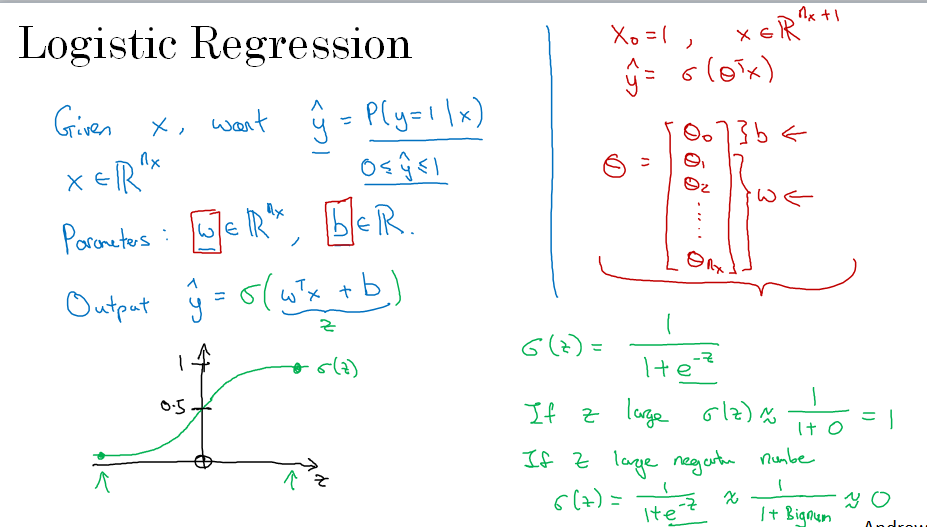

In [ ]:
path2 = path + '3.PNG'
img2 = Image.open(path2)
img2

##Cost Function

- To train the logistics regression model parameters $w$ and $b$, we need to define a cost function

- Also its importat to define a **Loss function, which measures how well the model is doing on a single training example**

  - Using a squared error $L(y_{hat},y) = \frac{1}{2} [y_{hat} -y]^{2}$ gives us an optimization problem 
  
  - which is non-convex and ending up with multiple local optimal

  - and therefore, it does not make gradient descent 

- The right Loss function to be used is given;

  $$L(y_{hat},y) = -(ylogy_{hat} + (1-y)log(1-y_{hat})) $$ 

- If $y = 1$, then $$L(y_{hat},y) = -log(y_{hat})$$, 
  
  - To make the loss small, then $log(y_{hat})$ and then $y_{hat}$ should be as large as possible 

  - but it cant be larger than 1 since its an output of a sigmoid

  - i.e $y_{hat}$ should be close to $y$ as much as possible to make the loss value as small as we can achieve

- If y = 0, then $$L(y_{hat},y) = -log(1-y_{hat})$$

  - To make the loss function small, then  $log(1-y_{hat})$ to be large (i.e $y_{hat}$ should be as small as possible)


- The **Cost Function however meaures how we are doing on the entire training set**
$$J(w,b)= \frac{1}{m} \sum^{m}_{i=1} L(y_{hat}^{(i)},y^{i}) $$

- and by substituring the loss function formular above;

$$J(w,b)= -\frac{1}{m} \sum^{m}_{i=1}[y^{(i)}logy_{hat}^{(i)} + (1-y^{(i)})log(1-y_{hat}^{(i)})] $$

- while the Loss function refers to the a single training example, the cost function gives the average of the losses of the entire training sample

- In training the logistics regression model, there is a need to find to find the parameters $w$ and $b$ taht minimize the overall cost function $J$


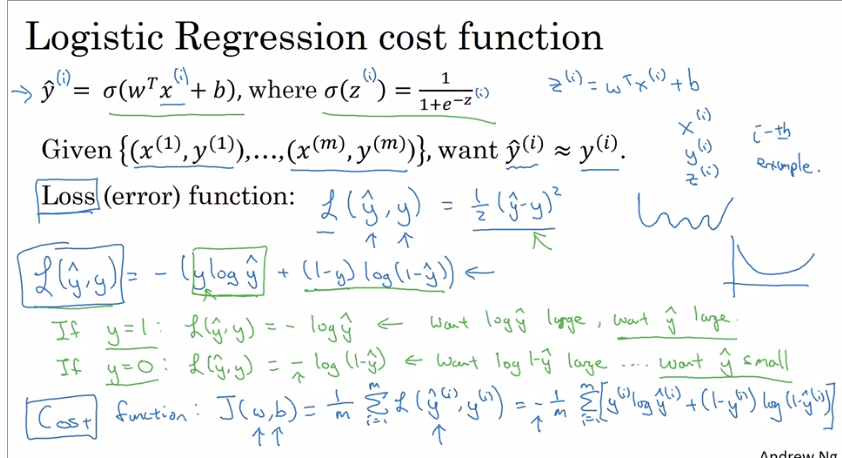

In [ ]:
path5 = path + '5.PNG'
img5 = Image.open(path5)
img5

##Gradient Descent

- the main  task here is to find $w$ and $b$ that will make $J(w,b)$ as small as possible

  - i.e the values $w$ and $b$ that correspond to the minimum point of $J(w,b)$

  - this particular cost function $J(w,b)$ is a convex function

- To find values for $w$ and $b$, 

  -  There is a need to initialize $w$ and $b$ (random initialization)

  - from the initial points, Gradient  Descent takes as step to the steepest downhill direction

  -  and after few steps, there is eventually a convergence to the global optimal

- This is how Gradient Descent works;

  - from the initial points, it repeatedly makes an update on the parameters such that

  $$w := w - \alpha \frac{\partial J(w,b)}{\partial w} $$

  $$b := b - \alpha \frac{\partial J(w,b)}{\partial b} $$


  - where $\alpha$ is the learning rate, and it controls how big a step we take on each iteration

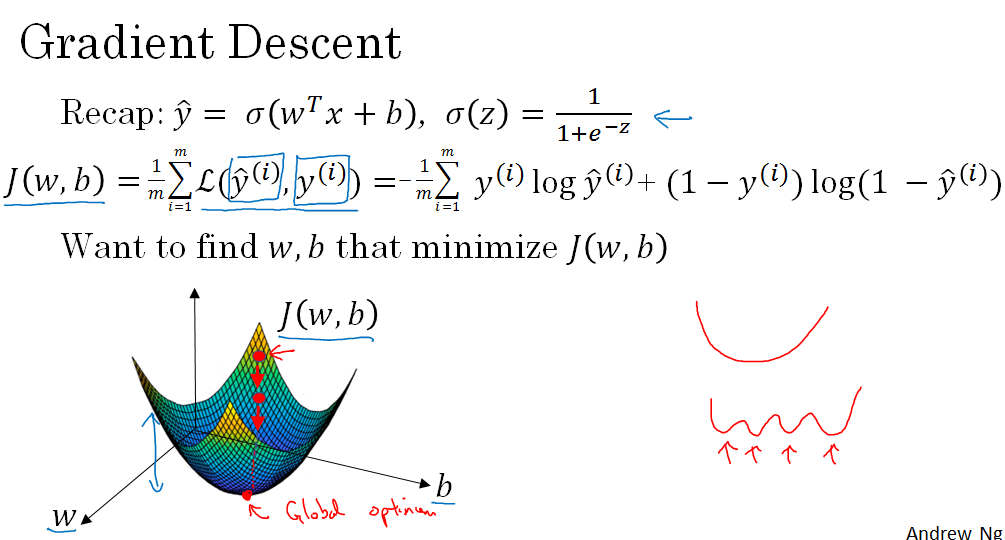

In [ ]:
path6 = path + '6.PNG'
img6 = Image.open(path6)
img6

##Computation Graph

- The compuatations of a Neural Neywork are organised in terms of;
 
 - Forward pass/propagation: in which the output of the NN  is computed.
 
 - and Backward pass/propagation: where gradients/derivatives are computed

- In computationa graph, there is always a final output(Cost function-$J$), through is computed via a forward pass process(Left to Right)

- and from which we can compute the various derivatives of the output w.r.t any other intermidiate variables via the backward pass 

- An example for the back propagation of the cost function of the logistics regression for a single training example is shown below

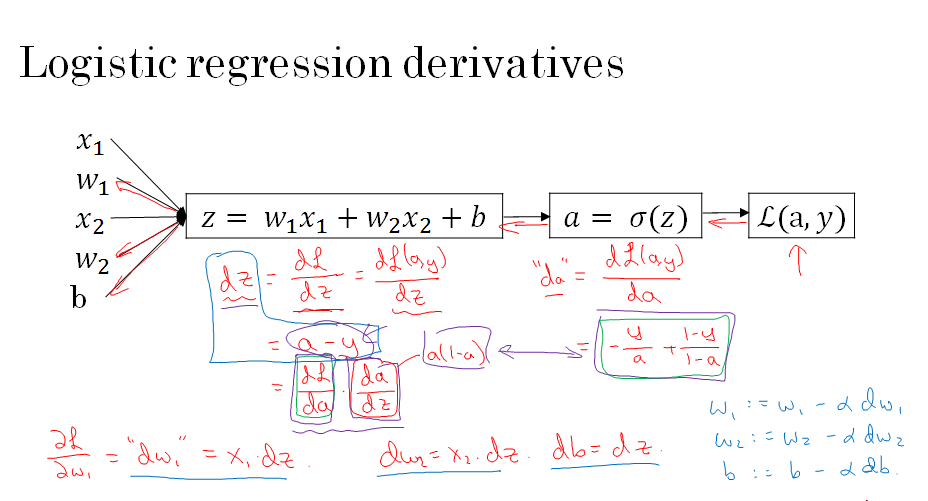

In [ ]:
path8 = path + '8.PNG'
img8 = Image.open(path8)
img8

# Neural Network

### Neural Network Representation

- The Neural Network is made up of the ; input, Hidden and the output layers

- The values of the hidden layers are not shown in the training set

- The notation $A^{0}$ represents $X$  which is the input features. 

- $A$ denotes activations (i.e the values that different layers of the neural network are passing on to the subsequent layers. 

- So the input layer passes on the value x to the hidden layer.

- we dont count the input layer as part of the layers in the NN, counting start from the hidden layers(bcos the input layer is layer 0)

- below is a 2-layer NN(1 hidden layer and 1 output layer)

-  The hidden layer and the output layers will have parameters associated with them. So the 1st hidden layer will have associated with it parameters $w^{1}$ and $b^{1}$.

-  The dimension of the parameter $w$ will be **(num_of_nodes_in_the_hidden_units * num_of_input_featurres)**; i.e the $w^{1}$ below will have dimension ($4*3$) and $b^{1}$ dimension is $(4*1)$

-  The output has parameters $w^{[2]}$ with dimension $(1*4)$ [1-unit in the oitput layer, 4 incoming features from the hidden layer] and  $b^{[2]}$ with dimension $(1*1)$ 

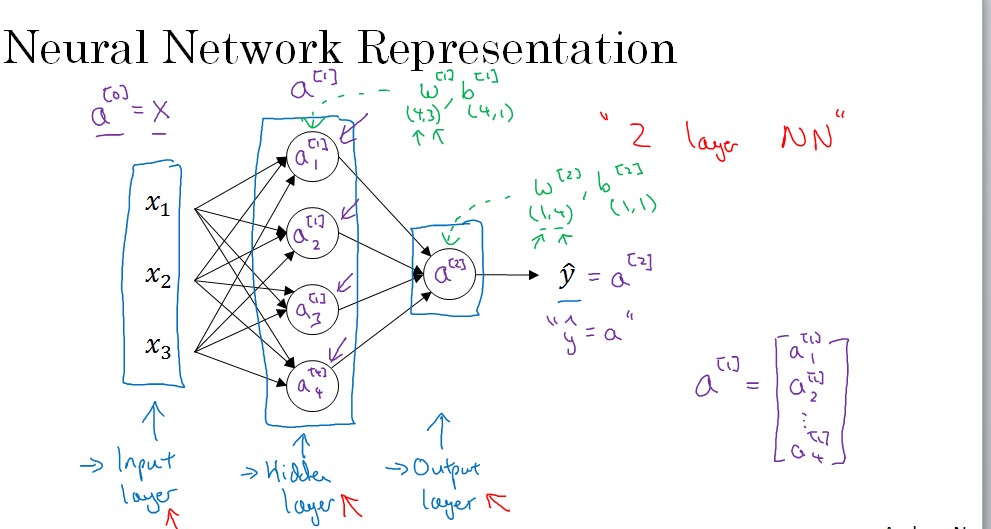

In [ ]:
path12 = path + '12.PNG'
img12 = Image.open(path12)
img12

 - The computation of the various outut parameters in the NN layers is shown below;

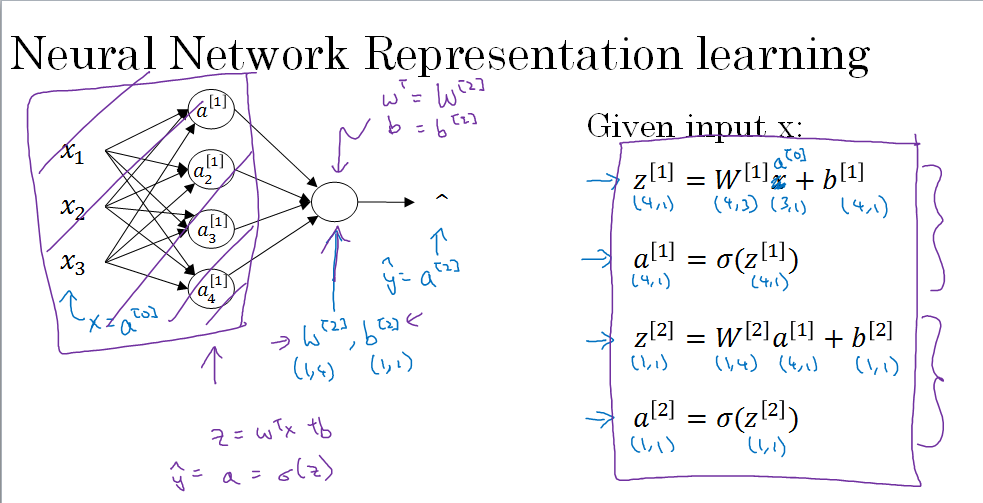

In [ ]:
path14 = path + '14.PNG'
img14 = Image.open(path14)
img14

### Activation Functions

- Activations functions are used in the hidden layers and output layers to process the output in each nodes

- Previously we have been using sigmoid activation function - $\sigma$, other ctivation functions exists as well

- **Tangent / Hyperbolic tangent function - tanh()**:

   - it goes from -1 to +1 as shown in *1* below and it is mathematically a shifted version of the $\sigma$ function

   - its formula is written as $$tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} $$

   - this almost always works better than the $\sigma$ function in the hidden layers because the mean of the activations that comes out of the hidden layer are closer to 0
   
   - this helps center the data and allows the  data to have a mean that is closer to 0 (rather than 0.5 unlike the $\sigma$) and this makes the learning for the next layer a little bit easier

   - However, for the output layers, the $\sigma$ functions is essentially especaiilay when working with binary classication

   - since the desired output $y^{hat}$ is expectec to be between $0$ and $1$

- Essentillay we can have different activation functions for different layers

- One of the drawbacks of the the $tanh()$ and the $\sigma()$ functions; 

  - is that when $z$ is either very large or very small,
  
  -  then the gradient or the derivative or the slope of this function becomes very small.
  
  - So if $z$ is very large or z is very small, the slope of the function ends up being close to 0.
  
  -  And so this can slow down gradient descent.



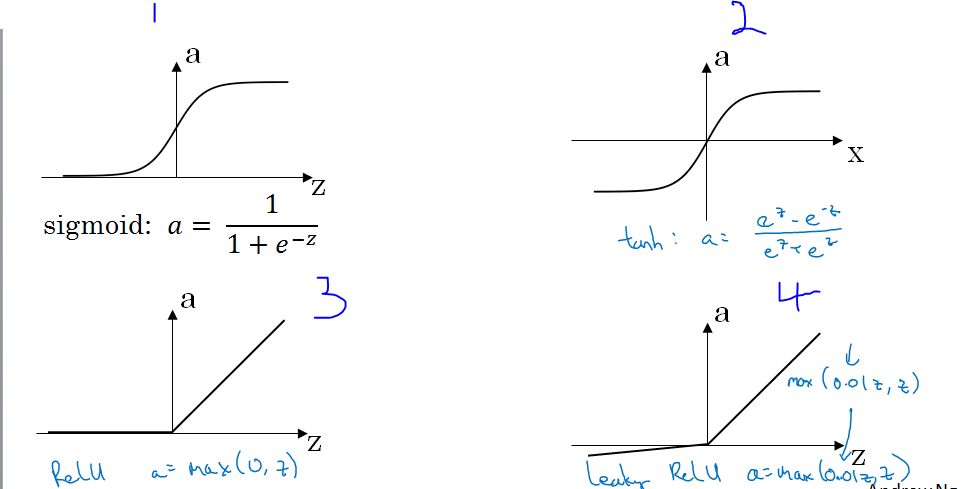

In [ ]:
path17 = path + '17.PNG'
img17 = Image.open(path17)
img17

- **Rectify Linear Unit(ReLu) an d**:

  - This is shown is figure-3 below, and its formular is $$Relu(z) = max(0,z)$$

  - its derivative is $1$, so long as $z$ is positive, and the 0 when $z$ is negative. Technically the derivative when $z$ is exactly 0 is not well defined.
  
  -  But when implemented in the computer, the slope at $z=0$ is equals $0000000000000$, and is negligible 

  - $leakyReLu$ this is a modified version of the $ReLU$ function  $$leakyRelu(z) = max(0.01z,z)$$

  - The advantage of both the $ReLU$ and the $leaky ReLU$ is that for a lot of values of $Z$, the derivative/slope of the activation function is not 0. 
  
  - So in practice, using the $ReLU$ activation function will make the NN learn much faster than when using the $tanh$ or the $sigmoid$ activation function. 
  
  - And the main reason is that the $ReLu$ has less effect of its slope going to 0, (zero-slope values slows down learning).
  
  -  Although, for the half of the range of $z$, the slope of $ReLU$ is $0$, but in practice, enough of your hidden units will have $z$ greater than $0$. So learning can still be quite fast for most training examples


- Rule of thumb in choosing activation functions:

  - Dont use the $\sigma$ function unless the desired output is 0, 1 value (as in binary classification),
  
  - Use the $ReLU/leaky ReLU$ activation function for other hidden units.(although ReLU is most;y used in practice)

- Note: 
  
  - we use non-linear activations function and not linear activation functions because;
  
  - using such in our hidden layer simply means computing a linear combination of the input features and it will be completely useless

  - Linear Regression problem can use linear activation for the output layer (but not the hidden- use $ReLU$ for that)  


  


### Gradient Descent for NN

- Before going to gradient descent, its important to show the derivatives of the various activation functions;

- $Sigmoid Function$

  - Let the sigmoid function be given as; $$ a = g(z) = \frac{1}{1+e^{-z}}$$

  - Its derivative is expressed as; $$ g^{'}(z) = \frac{1}{1+e^{-z}} \left(1 -  \frac{1}{1+e^{-z}}  \right)$$

  - and this is simplifed as;  $$ g^{'}(z) = a(1-a) $$


  
- $Tanget Function$

  - Let the $tanh$ function be given as; $$g(z) = tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} $$

  - Its derivative is expressed as; $$ g^{'}(z) = 1 - (tanh(z))^{2}$$

  - and with $a = g(z)$, this is simplifed as;  $$ g^{'}(z) = 1-a^{2} $$

- $ReLU Function$

  - Let the $ReLU$ function be given as; $$g(z) = max(0,z) $$

  - Its derivative is expressed as; $$ 
    g^{'}(z) = \left\{\begin{array}{lr}
        0, & \text{if } z < 0\\
        1, & \text{if } z \geq 0\\
        \end{array}\right\} $$

- $leaky-ReLU Function$

  - Let the $leakyReLU$ function be given as; $$g(z) = max(0.01z,z) $$

  - Its derivative is expressed as; $$ 
    g^{'}(z) = \left\{\begin{array}{lr}
        0.01, & \text{if } z < 0\\
        1, & \text{if } z \geq 0\\
        \end{array}\right\} $$



- The fomular for forward and backward propagations are shown below:

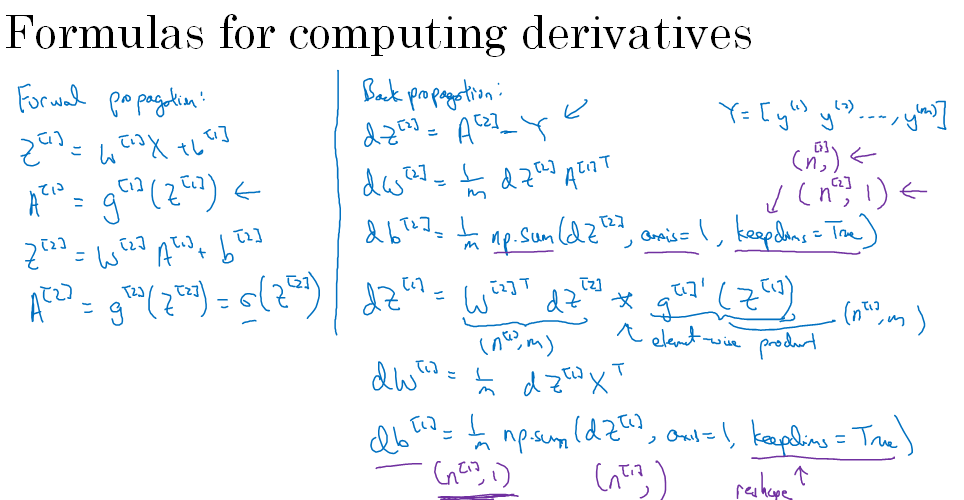

In [ ]:
path18 = path + '18.PNG'
img18 = Image.open(path18)
img18

- The Backward propagation formular is written more cleary below

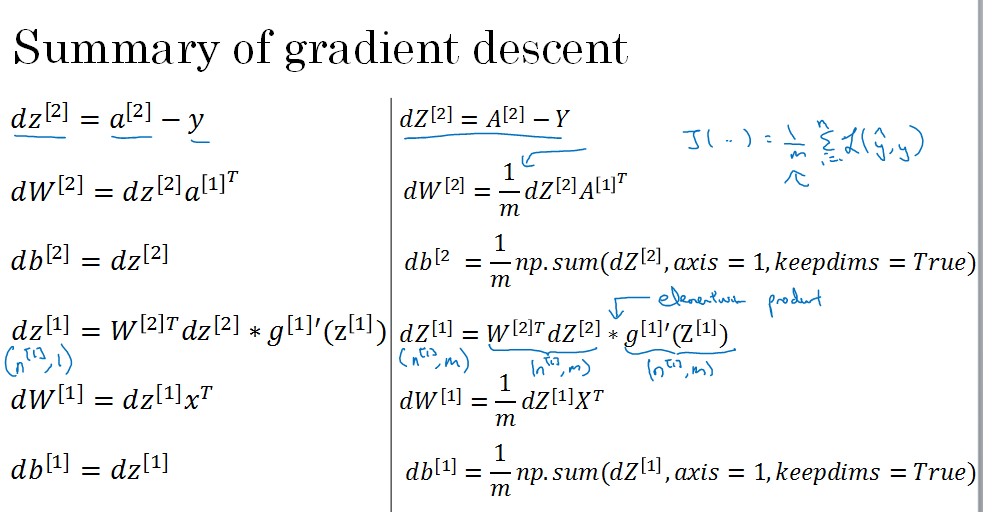

In [ ]:
path19 = path + '19.PNG'
img19 = Image.open(path19)
img19

### Random Initialization

- Random initilization of the weights of the hidden layers of the NN is very important.

- Initilizing the weights to 0 will give problem, because this will make all the hidden units to compute the same results,

- but the bias can be initilized to 0

- E.g we can do a random initilization of the $2by2$ weight matrix  by doing; $$W^{[1]} = np.random.randn((2,2))*0.01$$

- we multiply by $0.01$ to initilize the weigths to a very small random values, 

- *because if the weights are too large, our gradient descent will be slow(especially while using tanh() or sigma()), and in returns , learning will be very slow*

- there are other constants we can use(other than 0.01) especially when training a Deep Neural Network

- $b$ can be initialized to zero since it does not have the symmetry problem unlike when $W$ i sinitilized all to $0$.we cam therefore have ; $$b = np.zeros((2,1))$$

## Deep Neural Networks



- This is neural networks with much more higher numbers of of layers 

- the deeper layers extract more complex features of an input than the earlier layers

- For the same task, Deep Neural Networks requires relatively less amount of layers,

  - while Shallow network requires an exponentially higher amount of layers

- The correct matrix dimensions for necessary computation are given below;

  $$W^{l},dW^{l} : [n^{l},n^{(l-1)}] $$
  $$b^{l},db^{l} : [n^{l},1] $$

- and for a vectorized operations: 

  $$Z^{l}, A^{l} = [n^{l},m]$$
  $$dZ^{l}, dA^{l} = [n^{l},m]$$


## Forward and Backward Functions

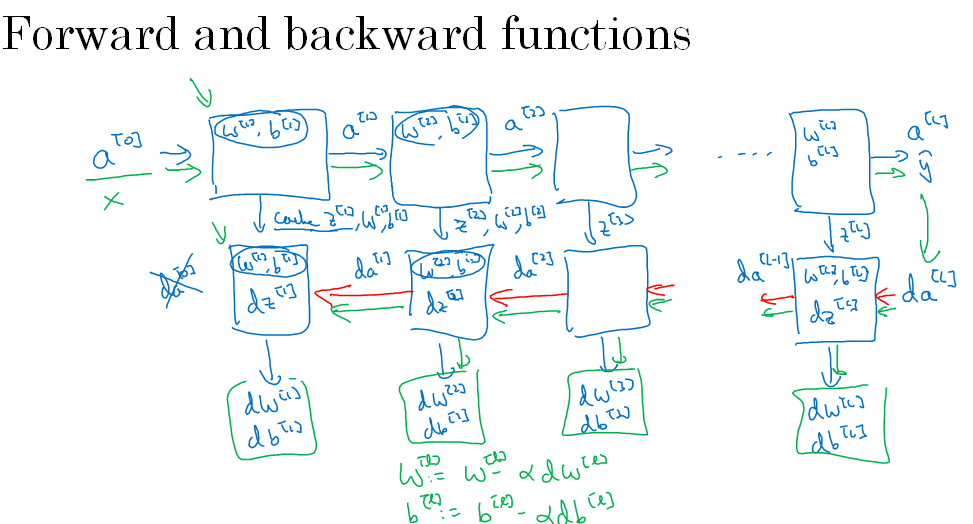

In [ ]:
path20 = path + '20.PNG'
img20 = Image.open(path20)
img20

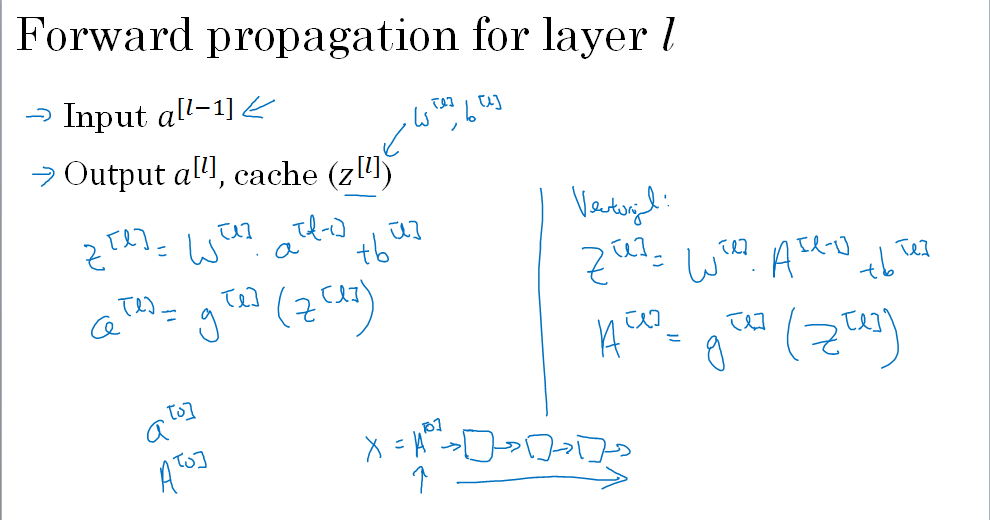

In [ ]:
path21 = path + '21.PNG'
img21 = Image.open(path21)
img21

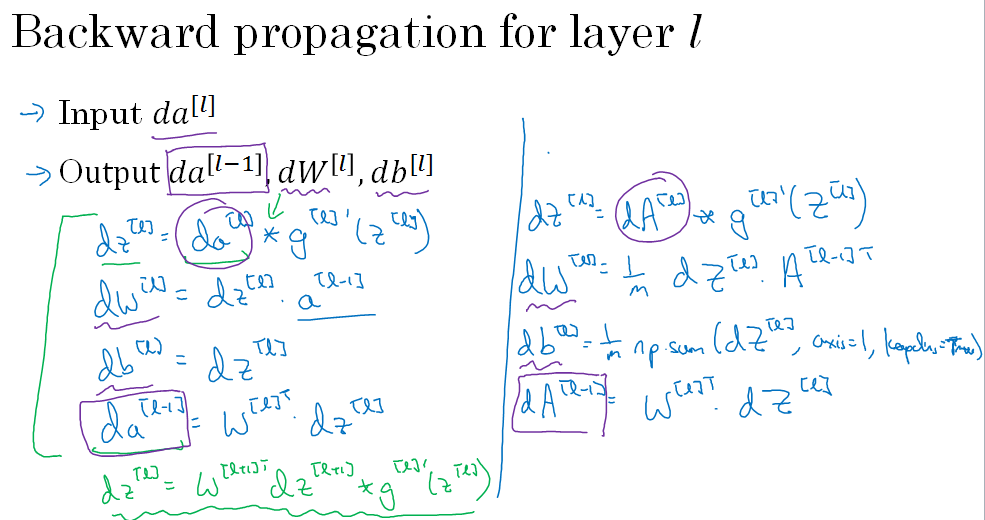

In [ ]:
path22 = path + '22.PNG'
img22 = Image.open(path22)
img22

## Parameters and Hyperparameters

- Parameters for Deep Neural Neworks are $Weights[W^{l}]$ and $biases[b^{l}]$ , they determine the output of the Neural Network layers

- Hyperparameters are paramters that control the ultimate parameters:

 - **learning rate**

 - **Num of hidden layers**

 - **Num of iterations**

 - **Num of hidden units**

 - **choice of activation function**

 - **mini-batch**

 - **Momentum**

# Section-2

# Hyperparameter Tuning

## Train/ Dev/ Test sets

- When buidling a NN, some of the important decisions to make include:

  - How many layers and hidden units(nodes) should my NN  have?

  - what learning rate and activation functions should I use? 

  - the choice of hyperparameters is hard to make at the first time

- Usually when we have our data, we divide it into 3 different parts:

  - **Train set**: For training the various models

  - **Hold-Out Cross-validation/ Development set**:  for checking which of many different models performs best on your dev set, (used in choosing the best performing model)

  - **Test set**: after picking the best model based on performance from the hold-up set, evaluate the final model on the test set.
(this will give an unbiased estimate of how well the final model is doing)

- Previously the practice of data splitting(especially with relatively small amount of data) is:

  - 70:30 for Train:Test or 60:20:20 for Train:Hold-up:Test

- But in the current age of big data, small amount of data can be used for hold-up and test sets: 

  - 98:1:1 - Train:Hold-up:Test or even smaller


## Bias and Variance:

- For high dimensional features , we look at the training error and the dev/hold-out error to see is the variance/bias of the model

- **Given that the optimal/base error is quite small or 0%, and the train and hold-up set are drawn from same distribution:**

  - if the model is doing very well on teh training set (small training error 1% for instance), but doing relatively pooerly on the development set(high hold-up eror e.g 11%),
  
    -  then the model is likely overfitted(good performance on training, poor on hold-up) and its a case of **high variance**

  - if we have high training error(e.g 15%) and high hold-up error(which is not too far from the training error- e.g 16%),
  
    - then the model is underfitting the data and its a case of **high bias**

  - if the training error is high (e.g 15%) and the hold-up error is even worse(e.g 30%), 
  
    - then its a case of **high-bias and high-variance** 

 - if the training error is low (e.g 0.5%) and the hold-up error is even low as well(e.g 1%), 
  
    - then its a case of **low-bias and low-variance** 


- Generally: 
  
  - High Training error == High Bias (model underfitting the data)
  
  - High Test/Hold-up error == High Variance (model overfitting the data)

## Regularization

### Regularization in logistic Reg

- When the NN model overfits (i.e it has a high variance problem), one of teh first thing to do is regularization

- Although one other way to tackle high variance situation is to get more training data, which might be expensive to get sometimes

- For **logistics regression** with parameters $w \in R^{n_{x}}$ (a vector) and $b \in R$ (a singel number),

  - to add regularization to the cost funstion, we have:

$$J(w,b)= \frac{1}{m} \sum^{m}_{i=1} L(y_{hat}^{(i)},y^{i})  + \frac{\lambda}{2m} ||w||^{2}_{2} $$

- where  $||w||^{2}_{2} =  \sum_{j}^{2} w_{j}^{2} =  w^{T}w$  which is the euclidean norm of $w$

- and $\lambda$ is the regularization parameter, and it is set using the hold-out/dev set, 

  - and its an hyperparameter that needs to be tuned as well

- the above form of regularization is called *L2 Regularization* because the *L2 norm of w* is being used here, 

  - and it is the most popular form of regularization

- there is also $L1$ regularization, where we add:

$$L1_{regularization} =  \frac{\lambda}{2m} ||w||^{2}_{1} = \frac{\lambda}{2m} |w| $$
 
- note that the constant 2 in the denominator is just scaling factor, it could as well be 1

- $L1$ regularization tends to make the model very sparse(lots of zero), it therefore compresses the model(as less memory will be needed to store the model)

###Regularization in NN

- In a  **Neural Network** with **L** layers, regularization is added to the cost function as shown below;

$$J(w^{1},b^{1},...w^{L},b^{L})= \frac{1}{m} \sum^{m}_{i=1} L(y_{hat}^{(i)},y^{i})  + \frac{\lambda}{2m} \sum^{L}_{l=1}   ||w^{[l]}||^{2}_{F} $$

- where $||w^{[l]}||^{2}_{F} = \sum_{i=1}^{l} \sum_{j=1}^{l-1} (w_{ij}^{2})$ 

  - and it is the Frobenius norm of matrix $w$, which is just the sum of the squares of the elements of $w$ 
  
  - (recall dimension of $w = (n^{[l]},n^{[l-1]})$.

- Now with the $L2$ regularization term, the gradient descent term becomes:

  - $dw^{[l]} = (from - back-prop) + \frac{\lambda}{m}w^{[l]}$ 

  - $w^{l} = w^{l} - \alpha dw^{[l]} $

  - $w^{l} = w^{l} - \frac{\alpha \lambda}{m}w^{l} - \alpha(from - back-prop)$  

  - $w^{l} = w^{l}(1 - \frac{\alpha \lambda}{m}) - \alpha(from - back-prop)$

- $L2$ regularization is also called **weight decay** because as shown above, 

  - we are simply multiplying the $w^{l}$ by $(1 - \frac{\alpha \lambda}{m})$ which ia slightly less than 1, 
  
  - this will typically **decay the weight**

**Why Regularization works**

- When we set $\lambda$ to be very large, it makes the values of $w$ to be very close to 0 (relatively small)

- this in practice means that most of the hidden layers are shut down(technically they have a very little effect in teh network)

  - and the deep NN resolves into a much more simpler Network

### Dropout Regularization

- To prevent overfitting with dropout, we set some probability of eliminating a node in neural network

- the dropout random knocks out units from the network based on the set probability

- For each training example, we end up using a slightly dimished version of the network for training and this helps to prevent overfitting

- Inverted dropout is the most common dropout implementation

- Different layers might have different probability of keeping its units

- Do not ad dropput during the test time

**Other Regularization Method**

- **Data Augumentation**: is another way to prevent overfitting

- since its always more expensive to get new dataset, different variants of the already exisiting datasets can be added to the training set

- like horitally flipped, rotated, cropped or zoomed versions of the training set is added to the set to increase the overall training set.

- **Early Stopping**: this refers to the fact that you're just stopping the training of your neural network earlier before the value of $w$ gets really large

- The downside of early stopping is that it combines both the optimization task(reduction of the cost function) and the "reduction of overfitting" tasking toghter and while stopping early, the reduction of the cost function might not be totallly successful

## Setting up Optimization Problem:

### Normalization of Input

- One way to make the training of NN go faster is to normalize the input data, and this is done in 2-steps;

  - 1. Zero out/subtract out the mean (we move the training set until it has zero mean)

  - 2.To normalize the variances

